In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка датасета
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Разбивка на тренировочный и тестовый датасет
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df.target, test_size=0.2, random_state=101)

In [4]:
# Выбор моделей
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {'LogisticRegression': LogisticRegression(),
          'svm': SVC(probability=True),  # Для ROC-AUC нужен параметр probability=True
          'DecisionTree': DecisionTreeClassifier(),
          'RandomClassifier': RandomForestClassifier()}

metrics_data = []
cm_matrices = []  # Список для хранения матриц ошибок

for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train, y_train)  # тренировка моделей
    
    # предсказание значений
    y_pred = model.predict(X_test)
    
    # оценка производительности на тестовом наборе данных
    model_test_accuracy = accuracy_score(y_test, y_pred)
    model_test_f1 = f1_score(y_test, y_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_pred, average='weighted')
    
    # Если модель поддерживает predict_proba (требуется для roc_auc_score)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        model_test_roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        model_test_roc_auc = 'Not applicable'
    
    # матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    cm_matrices.append((model_name, cm))  # Сохранение матрицы ошибок для последующего вывода
    
    # Сохранение метрик для сравнения
    metrics_data.append({
        'Model': model_name,
        'Accuracy': model_test_accuracy,
        'F1 Score': model_test_f1,
        'Precision': model_test_precision,
        'Recall': model_test_recall,
        'ROC AUC': model_test_roc_auc if model_test_roc_auc != 'Not applicable' else None
    })
    
    # Вывод метрик
    print(model_name)
    print('*' * 19)
    print('y_pred : ', y_pred)
    print(str(model_name) + ' model_score : ', model.score(X_test, y_test))
    print('viewing the accuracy = ', list(y_test - y_pred))
    print('  ')
    print('TEST PERFORMANCE:')
    print('-----------------')
    print('model_test_accuracy = ', model_test_accuracy)
    print('model_test_f1_score = ', model_test_f1)
    print('model_test_precision = ', model_test_precision)
    print('model_test_recall = ', model_test_recall)
    if model_test_roc_auc != 'Not applicable':
        print('model_test_roc_auc = ', model_test_roc_auc)
    print('  ')

LogisticRegression
*******************
y_pred :  [0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0]
LogisticRegression model_score :  1.0
viewing the accuracy =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  
TEST PERFORMANCE:
-----------------
model_test_accuracy =  1.0
model_test_f1_score =  1.0
model_test_precision =  1.0
model_test_recall =  1.0
model_test_roc_auc =  1.0
  
svm
*******************
y_pred :  [0 0 0 2 1 2 1 1 2 0 2 0 0 2 1 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0]
svm model_score :  0.9666666666666667
viewing the accuracy =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  
TEST PERFORMANCE:
-----------------
model_test_accuracy =  0.9666666666666667
model_test_f1_score =  0.9662222222222222
model_test_precision =  0.9692307692307692
model_test_recall =  0.9666666666666667
model_test_roc_auc =  1.0
  
DecisionTree
*******************
y_pred :  [0 0 0 1 1 2 1 1 2 0 2 0 0 2 2 1 1

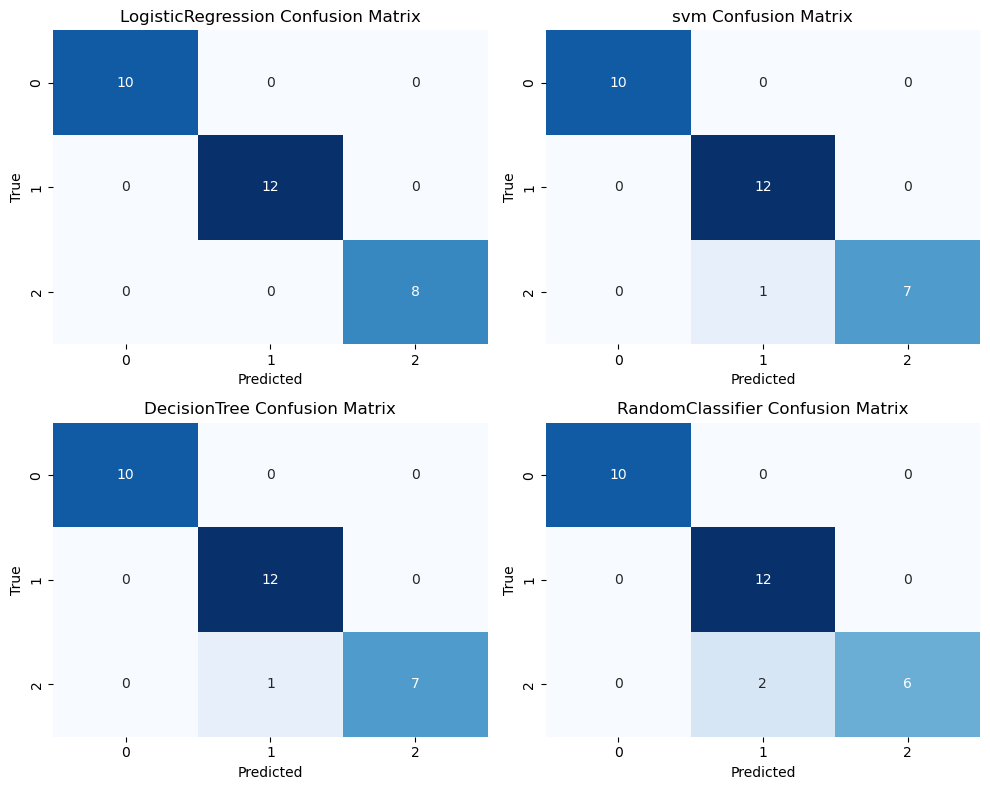

In [5]:
# Отрисовка всех матриц ошибок в одном графике 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Создание сетки 2x2
axes = axes.ravel()  # Преобразование axes в одномерный массив для удобства доступа

for idx, (model_name, cm) in enumerate(cm_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{model_name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

plt.tight_layout()  # Оптимизация размещения графиков
plt.show()